In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState 


In [2]:
x=np.linspace(1,20,50)
np.random.seed(42)
y=[]
for i in x:
    if i<7.5:
        y.append(0)
    elif i<12.5:
        lab=np.random.randint(2)
        y.append(lab)
    else:
        y.append(1)
y=np.array(y)


In [3]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.0035
    

    for i in range(iterations):

        y_predicted = m_curr*x + b_curr
        
        cost = (1/n)*sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr =m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd

        

        #print(f"m {m_curr}, b {b_curr}, iteration {i}, cost {cost}")

    return m_curr,b_curr,cost

0.07244581584278267 -0.30068105275596346 0.08406626650660348


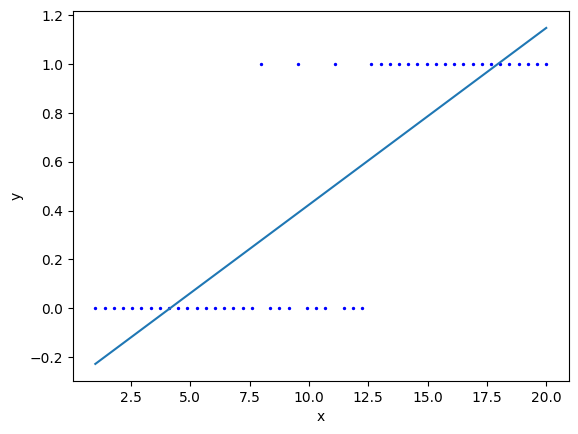

In [4]:
plt.scatter(x, y, c ="blue", s = 2)
plt.xlabel("x")
plt.ylabel("y")

m,b,cost_=gradient_descent(x,y)
print(m,b,cost_)

plt.plot(x,m*x+b)



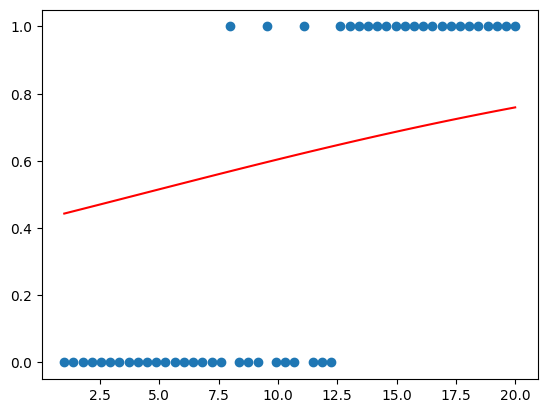

In [5]:
plt.scatter(x,y)
plt.plot(x,1/(1+np.exp(-1*(b+m*x))),c='red')

In [6]:
def logloss_ab(b,m):
    pred_y=1/(1+np.exp(-(b+m*x)))#logistic model
    loss=-(np.sum(np.array(y)*np.log(pred_y)))-np.sum((1-np.array(y))*np.log(1-pred_y))## log loss
    return loss

In [7]:
iterations = 50000
learning_rate = 0.030

for i in range(iterations):
    m = m
    b = b
    y_pred=1/(1+np.exp(-b-m*x))
    md = np.sum(x*(y_pred-y))/len(x)
    bd = np.sum(y_pred-y)/len(x)

    b = b-learning_rate*bd
    m = m-learning_rate*md
    loss = logloss_ab(b,m)

print(f'm {m}, b {b}, loss {loss}')


m 0.7735236443677634, b -8.720450580411221, loss 10.86627911349262


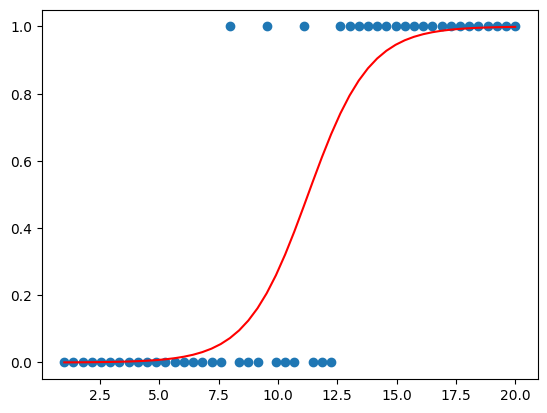

In [8]:
plt.scatter(x,y)
plt.plot(x,1/(1+np.exp(-1*(b+m*x))),c='red')

In [9]:
y2 = 1/(1+np.exp(-1*(b+m*x)))
y2

array([3.53622492e-04, 4.77251686e-04, 6.44074768e-04, 8.69160065e-04,
       1.17281378e-03, 1.58238532e-03, 2.13468227e-03, 2.87919050e-03,
       3.88234889e-03, 5.23319018e-03, 7.05072215e-03, 9.49347437e-03,
       1.27716429e-02, 1.71621745e-02, 2.30268424e-02, 3.08327177e-02,
       4.11731918e-02, 5.47855499e-02, 7.25577574e-02, 9.55126273e-02,
       1.24752804e-01, 1.61347718e-01, 2.06148986e-01, 2.59540357e-01,
       3.21165414e-01, 3.89721401e-01, 4.62931711e-01, 5.37775886e-01,
       6.10955353e-01, 6.79454821e-01, 7.41006274e-01, 7.94316431e-01,
       8.39037061e-01, 8.75557653e-01, 9.04732984e-01, 9.27633548e-01,
       9.45361658e-01, 9.58939029e-01, 9.69252223e-01, 9.77037103e-01,
       9.82885770e-01, 9.87264195e-01, 9.90533253e-01, 9.92969177e-01,
       9.94781606e-01, 9.96128643e-01, 9.97128969e-01, 9.97871372e-01,
       9.98422105e-01, 9.98830516e-01])

In [10]:
y_score = []

for i in y2:
    if i<0.5:
        y_score.append(0)
    else:
        y_score.append(1)

y_score = np.array(y_score)

In [11]:
print(f'score: {np.sum(y==y_score)/len(y)*100} percent')

score: 88.0 percent
